In [1]:
cd H:\jupyter_wd

H:\jupyter_wd


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts
import math
from pickle import dump

In [3]:
bmw = pd.read_csv('C://Users//HP//used-car-dataset-ford-and-mercedes//bmw.csv')

# bmw EDA

bmw.shape

In [4]:
bmw.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [5]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [6]:
print(bmw.duplicated().sum())

117


In [7]:
bmw = bmw.drop_duplicates()
bmw.shape

(10664, 9)

<AxesSubplot:>

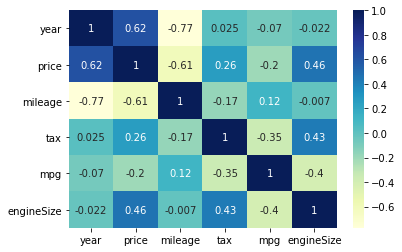

In [8]:
df =bmw[['year','price','mileage','tax','mpg','engineSize']]
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

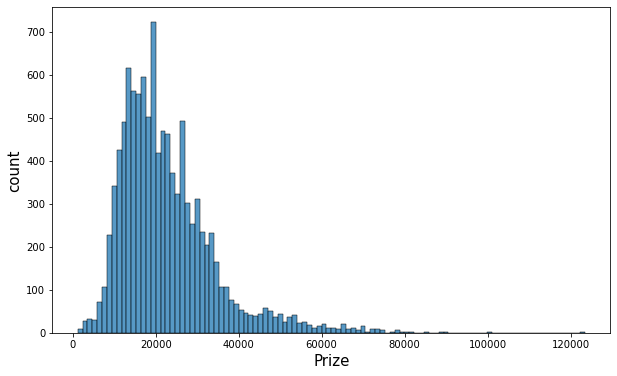

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(bmw['price'])
plt.xlabel('Prize',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

Text(0, 0.5, 'count')

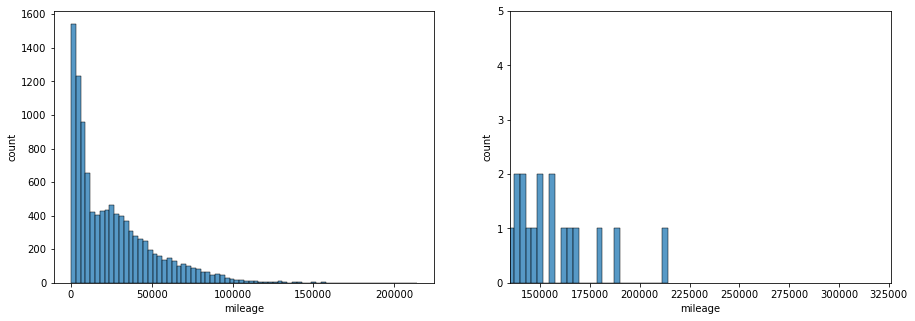

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(bmw['mileage'])
plt.xlabel('mileage')
plt.ylabel('count')

plt.subplot(1,2,2)
sns.histplot(bmw['mileage'])
plt.xlim(135000,326000)
plt.ylim(0,5)
plt.xlabel('mileage')
plt.ylabel('count')


In [11]:
bmw[bmw['mileage'] > 160000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8313,3 Series,2011,3493,Manual,190000,Diesel,20,68.9,2.0
9414,5 Series,2013,8999,Automatic,178987,Hybrid,190,40.4,3.0
9419,X5,2012,7250,Automatic,214000,Diesel,300,37.7,3.0
9554,1 Series,2007,1500,Manual,167000,Diesel,125,57.6,2.0
9696,3 Series,2004,1445,Manual,162000,Diesel,205,49.6,2.0
10004,5 Series,2010,6980,Automatic,164500,Diesel,140,53.3,2.0


In [12]:
bmw.sort_values('year',axis=0).head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9625,5 Series,1996,5995,Automatic,36000,Petrol,270,26.4,2.8
9841,Z3,1997,3950,Manual,49000,Petrol,270,35.3,1.9
9842,Z3,1998,3950,Manual,56500,Petrol,270,35.3,1.9
9938,Z3,1999,3950,Manual,58000,Petrol,270,35.3,1.9
9560,Z3,1999,3995,Manual,51949,Petrol,255,35.3,1.9


In [13]:
bmw = bmw[bmw['mileage'] < 160000]

Text(0, 0.5, 'count')

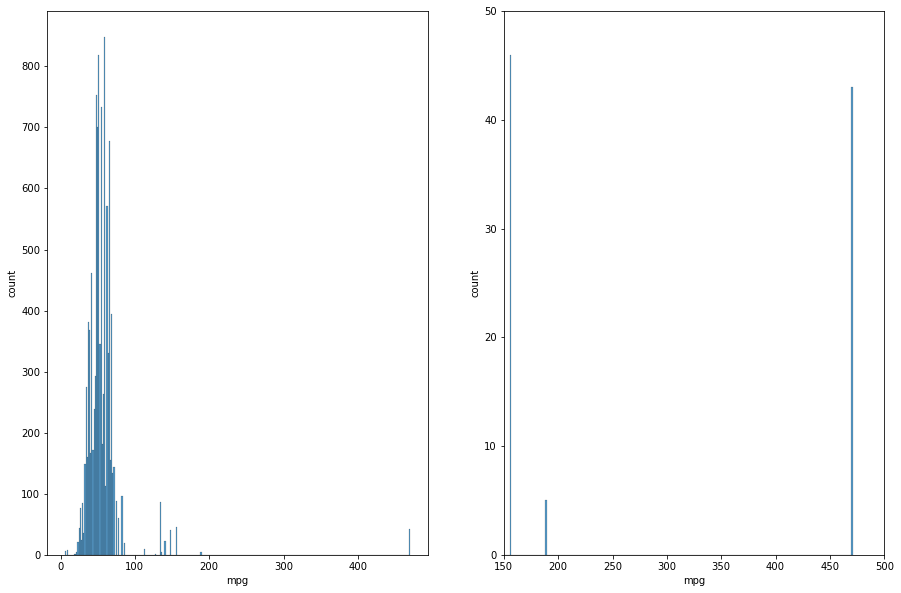

In [62]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(bmw['mpg'])
plt.xlabel('mpg')
plt.ylabel('count')

plt.subplot(1,2,2)
sns.histplot(bmw['mpg'])
plt.xlim(150,500)
plt.ylim(0,50)
plt.xlabel('mpg')
plt.ylabel('count')

In [15]:
bmw[bmw['mpg']>100]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16,3 Series,2017,14250,Automatic,55594,Other,135,148.7,2.0
32,i3,2016,17100,Automatic,25269,Other,0,470.8,0.6
35,2 Series,2017,13000,Automatic,61818,Other,0,141.2,1.5
86,2 Series,2017,16000,Automatic,32389,Other,0,141.2,1.5
138,3 Series,2017,17950,Automatic,43703,Other,140,134.5,2.0
...,...,...,...,...,...,...,...,...,...
10470,3 Series,2017,15900,Automatic,68875,Other,140,134.5,2.0
10530,i3,2017,17600,Automatic,50867,Other,135,470.8,0.6
10652,3 Series,2016,16500,Automatic,38438,Other,0,134.5,2.0
10727,3 Series,2017,18400,Automatic,27232,Other,135,134.5,2.0


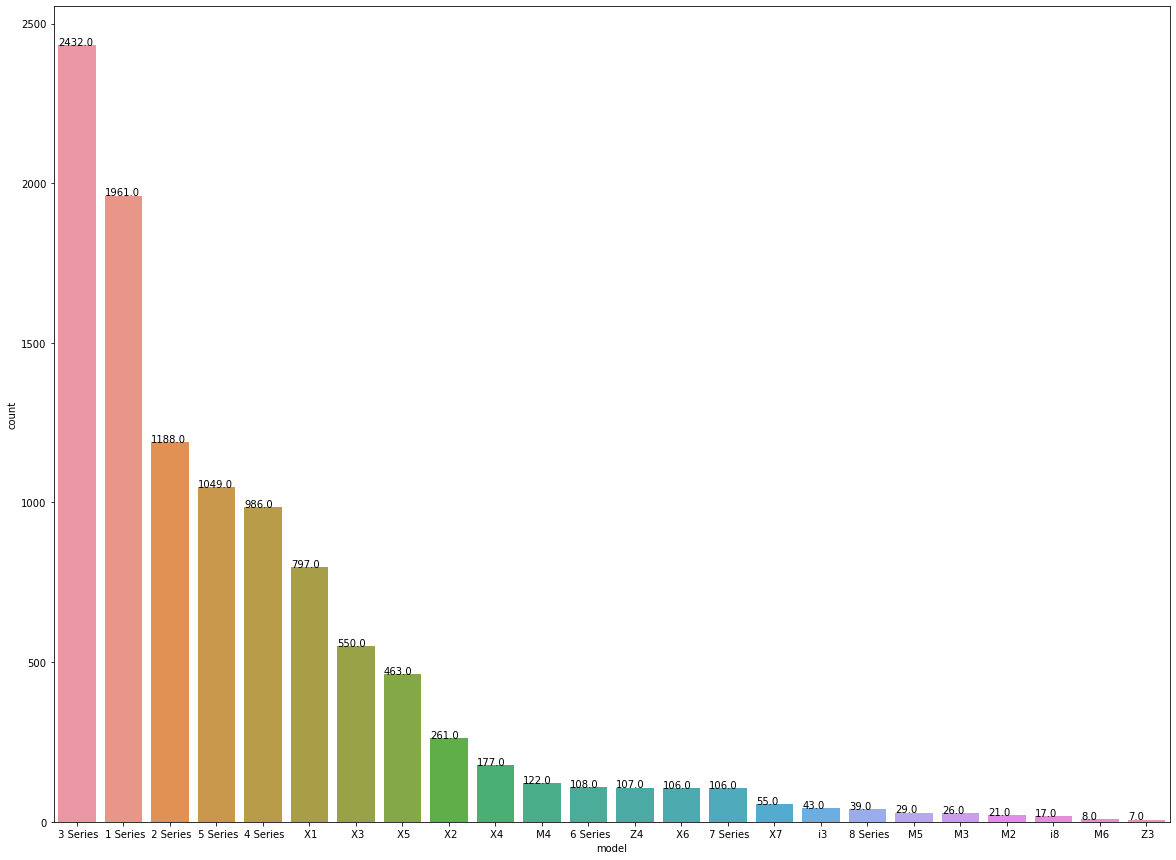

In [16]:
plt.figure(figsize=(20,15))
ax=sns.countplot(x='model', data=bmw,order=bmw['model'].value_counts().sort_values(ascending=False).index)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.show()

In [17]:
bmw.shape

(10658, 9)

In [19]:
bmw.shape

(10658, 9)

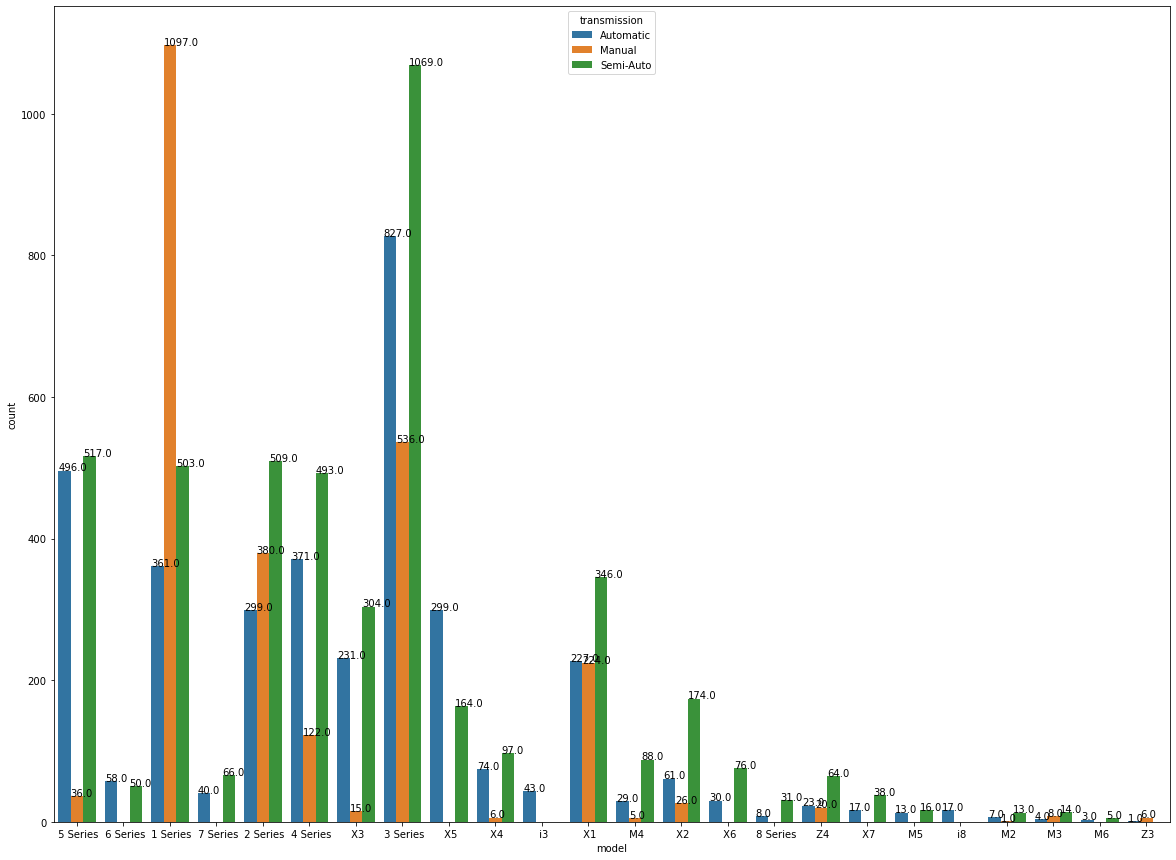

In [20]:
plt.figure(figsize=(20,15))
ax=sns.countplot(x='model', data=bmw,hue='transmission')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.show()

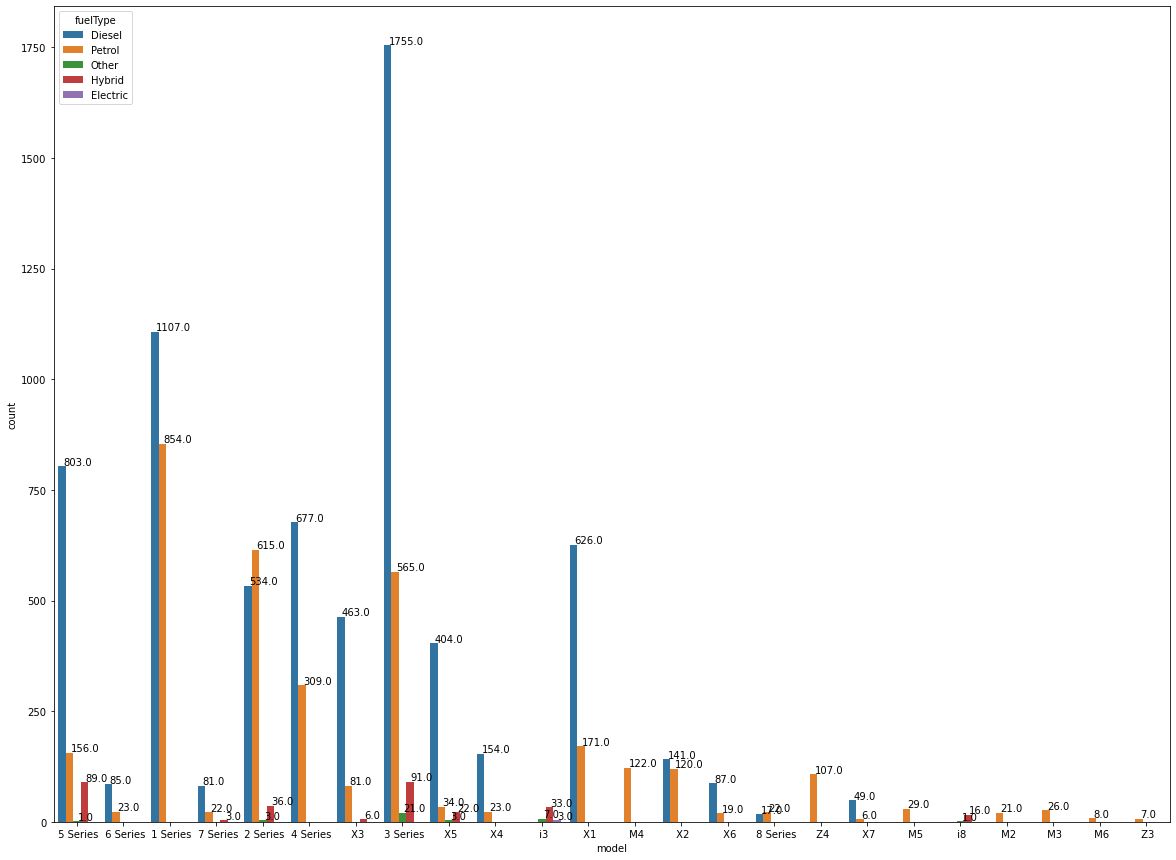

In [21]:
plt.figure(figsize=(20,15))
ax=sns.countplot(x='model', data=bmw,hue='fuelType')
for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+3))

plt.show()

In [22]:
models = bmw['model'].unique()
fuel_T = bmw['fuelType'].unique()
trans = bmw['transmission'].unique()


In [66]:
 rows = []
 for x in models:
   for y in fuel_T:
     for z in trans:
       max_Y = np.max(bmw['year'][(bmw['model'] == x) & (bmw['fuelType'] == y) & (bmw['transmission'] == z)]) 
       min_Y = np.min(bmw['year'][(bmw['model'] == x) & (bmw['fuelType'] == y) & (bmw['transmission'] == z)])
       if math.isnan(max_Y) or math.isnan(min_Y):
         continue
       rows.append([x,y,z,int(max_Y),int(min_Y)])
 pd.DataFrame(rows,columns=["model","fuel","transmission","l_manufac", "f_manufac"]).head()  

,model,fuel,transmission,l_manufac,f_manufac
0,5 Series,Diesel,Automatic,2020,2007
1,5 Series,Diesel,Manual,2016,2007
2,5 Series,Diesel,Semi-Auto,2020,2013
3,5 Series,Petrol,Automatic,2019,1996
4,5 Series,Petrol,Manual,2000,2000


# bmw Adavance analysis

In [24]:
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [25]:
# ln Transform price variable
bmw['price'] = np.log(bmw['price'])

In [26]:
model_ohe = pd.get_dummies(bmw.model)
model_ohe.head()

,1 Series,2 Series,3 Series,4 Series,5 Series,6 Series,7 Series,8 Series,M2,M3,...,X2,X3,X4,X5,X6,X7,Z3,Z4,i3,i8
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
transmission_ohe = pd.get_dummies(bmw.transmission)
transmission_ohe.head()

,Automatic,Manual,Semi-Auto
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [28]:
fuel_ohe = pd.get_dummies(bmw.fuelType)
fuel_ohe.head()

,Diesel,Electric,Hybrid,Other,Petrol
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [29]:
df = bmw.copy(deep=True)

In [30]:
df = df.drop(['model','transmission','fuelType'],axis = 1)

In [31]:
df.shape

(10658, 6)

In [32]:
df = pd.concat([df,model_ohe,transmission_ohe,fuel_ohe],axis=1)
df.head()

,year,price,mileage,tax,mpg,engineSize,1 Series,2 Series,3 Series,4 Series,...,i3,i8,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,2014,9.323669,67068,125,57.6,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2018,10.203592,14827,145,42.8,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2016,9.680344,62794,160,51.4,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2017,9.453287,26676,145,72.4,1.5,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2014,9.581904,39554,160,50.4,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [33]:
!pip install scikit-learn

In [34]:
#spliting data set
from sklearn.model_selection import train_test_split
x = df.drop(['price'],axis=1)
y = df[['price']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [35]:
x_train.head()

,year,mileage,tax,mpg,engineSize,1 Series,2 Series,3 Series,4 Series,5 Series,...,i3,i8,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
3046,2020,500,145,67.3,2.0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3567,2016,37648,30,64.2,2.0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6586,2019,8186,145,54.3,2.0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4926,2019,7153,150,33.6,3.0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
10071,2015,56131,30,62.8,2.0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [36]:
#normalize data 

from sklearn.preprocessing import  MinMaxScaler
minmax = MinMaxScaler()
normalized_x_train = pd.DataFrame(minmax.fit_transform(x_train) ,columns = x_train.columns)

normalized_x_test = pd.DataFrame(minmax.transform(x_test) ,columns = x_test.columns)

# save the model
dump(minmax, open('bmw_scaler.pkl', 'wb'))

In [37]:
normalized_x_train.head()

,year,mileage,tax,mpg,engineSize,1 Series,2 Series,3 Series,4 Series,5 Series,...,i3,i8,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,1.000000,0.003203,0.250000,0.132818,0.303030,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.833333,0.241654,0.051724,0.126155,0.303030,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.958333,0.052539,0.250000,0.104879,0.303030,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.958333,0.045908,0.258621,0.060391,0.454545,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.791667,0.360295,0.051724,0.123146,0.303030,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
web_table = x_train.iloc[[1],:].copy()
web_table.columns = web_table.columns.str.replace(' ', '')
for x in web_table.columns:
    web_table[x]= 0
    
#save the table
web_table.to_pickle("bmw_table.pkl")

In [39]:
web_table

,year,mileage,tax,mpg,engineSize,1Series,2Series,3Series,4Series,5Series,...,i3,i8,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
3567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
linreg.fit(normalized_x_train,y_train,)

# save the model
dump(linreg, open('bmw_model.pkl', 'wb'))


print ("iNTERCEPT : ",linreg.intercept_)
print ("CO-EFFICIENT : ",linreg.coef_)
print("\n")
y_pred = linreg.predict(normalized_x_test)

from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

iNTERCEPT :  0.0
CO-EFFICIENT :  [[ 2.43794208 -0.88688972  0.07528185 -1.45793546  1.0321965   0.12760987
   0.14813255  0.2455453   0.27495855  0.32876999  0.37391408  0.55220224
   0.83654785  0.49606895  0.90780029  0.62191388  0.69393904  0.56385058
   0.27065709  0.29543638  0.46133942  0.50347962  0.66901581  0.67689803
   0.96246961  0.92719176  0.31962097  1.63655586  1.30301643  4.75863945
   4.6653201   4.77297461  2.69143908  2.90941308  2.98933417  2.94656416
   2.66018367]]


R-Square Value 0.9276864605285516
mean_absolute_error : 0.09464221473179675
mean_squared_error :  0.01701920240808015
root_mean_squared_error :  0.1304576651948062


In [41]:
# build a linear Ridge model
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ridgeregcv = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv,fit_intercept=False)
# fit model
ridgeregcv.fit(normalized_x_train, y_train)
# summarize chosen configuration
print('alpha: %f' % ridgeregcv.alpha_,"\n")


# predict method uses the best alpha value
y_pred = ridgeregcv.predict(normalized_x_test)

# calculate R^2 value, MAE, MSE, RMSE
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

G:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.33317e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
G:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.82999e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
G:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.04666e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
G:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.4087e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
G:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.08706e-19): result may n

alpha: 0.010000 

R-Square Value 0.9276777969691812
mean_absolute_error : 0.09466281427857316
mean_squared_error :  0.01702124140204418
root_mean_squared_error :  0.13046547973331557


In [43]:
from sklearn.linear_model import LassoCV

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
lassoregcv = LassoCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, n_jobs=-1,fit_intercept=False)
# fit model
lassoregcv.fit(normalized_x_train,np.ravel(y_train))



LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        fit_intercept=False, n_jobs=-1)

In [44]:
# summarize chosen configuration
print('alpha: %f' % lassoregcv.alpha_)
print(len(lassoregcv.coef_))

alpha: 0.010000
37


In [45]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(normalized_x_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
0.8938132772483944

R-Square Value 0.6064599989065593


mean_absolute_error : 0.2095901157779764


mean_squared_error :  0.09262078696797607


root_mean_squared_error :  0.3043366342850891


0.8938132772483944

In [67]:
from sklearn.linear_model import ElasticNetCV

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,0.0, 1.0, 10.0, 100.0]
elasticnet = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1,fit_intercept=False,tol=10,max_iter=10**5)

elasticnet = elasticnet.fit(normalized_x_train,y_train)

# summarize chosen configuration
print('alpha: %f' % elasticnet.alpha_)
print('l1_ratio_: %f' % elasticnet.l1_ratio_)

G:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate

alpha: 0.000000
l1_ratio_: 0.000000


In [68]:
# summarize chosen configuration
print('alpha: %f' % elasticnet.alpha_)
print('l1_ratio_: %f' % elasticnet.l1_ratio_)
print(len(elasticnet.coef_))

alpha: 0.000000
l1_ratio_: 0.000000
37


In [69]:
#predict method uses the best alpha value
y_pred = elasticnet.predict(normalized_x_test)

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value -0.4783565781853125


mean_absolute_error : 0.4169379924449477


mean_squared_error :  0.3479355321196347


root_mean_squared_error :  0.5898606039732054


# further exploration on linear model

In [50]:
y_test_pred = linreg.predict(normalized_x_test)
test_r2 = r2_score(y_test,y_test_pred)
test_mae = metrics.mean_absolute_error(y_test,y_test_pred)
test_mse = metrics.mean_squared_error(y_test,y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
string_score_test =(f"R^2 on test set: {test_r2:.2f} "+f"\nMAE on test set: {test_mae:.2f} "+
               f"\nMSE on test set: {test_mse:.2f}"+f"\nRMSE on test set: {test_rmse:.2f}")



y_train_pred = linreg.predict(normalized_x_train)
train_r2 = r2_score(y_train,y_train_pred)
train_mae = metrics.mean_absolute_error(y_train,y_train_pred)
train_mse = metrics.mean_squared_error(y_train,y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
string_score_train =(f"R^2 on train set: {train_r2:.2f}"+f"\nMAE on train set: {train_mae:.2f}"+
               f"\nMSE on train set: {train_mse:.2f}"+f"\nRMSE on train set: {train_rmse:.2f}")


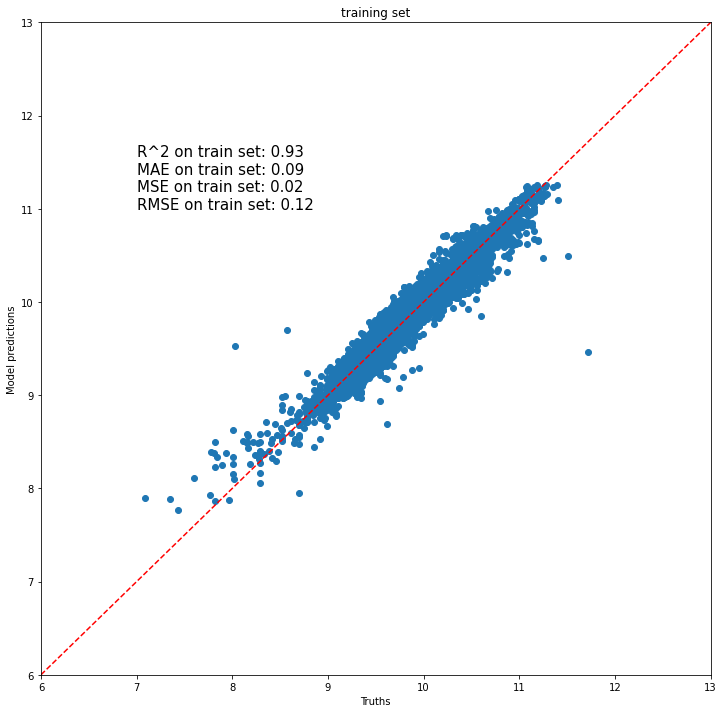

In [51]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.scatter(y_train, y_train_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(7, 11, string_score_train,fontsize=15)
plt.title("training set")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([6,13 ])
_ = plt.ylim([6, 13])


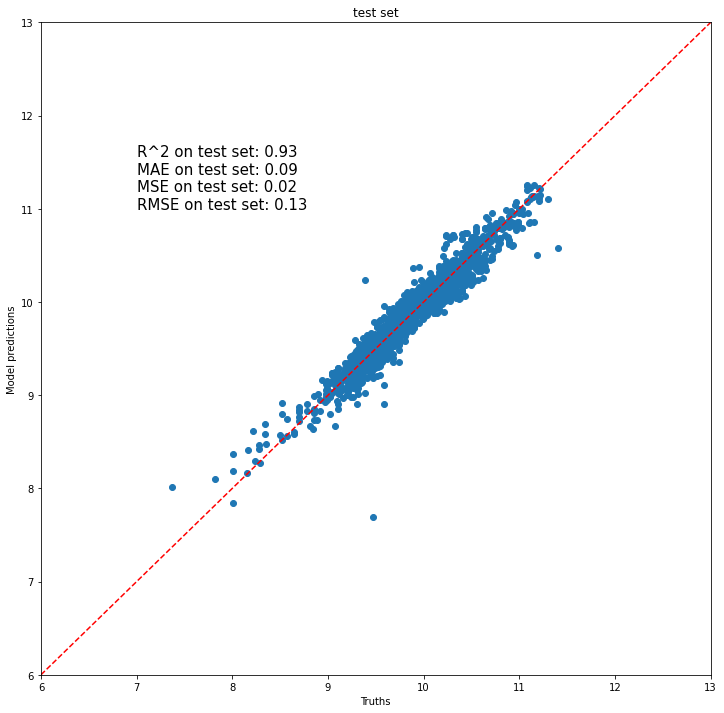

In [52]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.scatter(y_test, y_test_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(7, 11, string_score_test,fontsize=15)
plt.title("test set")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([6,13 ])
_ = plt.ylim([6, 13])

In [53]:
coef_table = pd.DataFrame({'variable':list(normalized_x_train.columns)}).copy()
coef_table.insert(len(coef_table.columns),"Coeffecient",linreg.coef_.transpose())
coef_table = coef_table.set_index('variable')
coef_table

,Coeffecient
variable,
year,2.437942
mileage,-0.886890
tax,0.075282
mpg,-1.457935
engineSize,1.032197
1 Series,0.127610
2 Series,0.148133
3 Series,0.245545
4 Series,0.274959


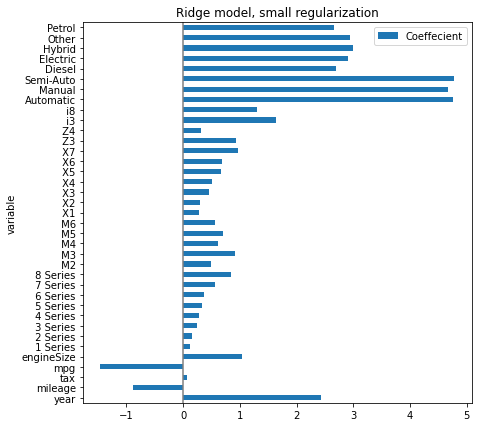

In [54]:
coef_table.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

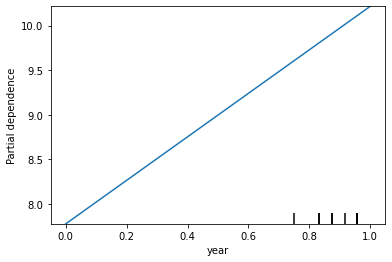

In [55]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(linreg, normalized_x_train, ['year'])